In [24]:
from dataloader import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

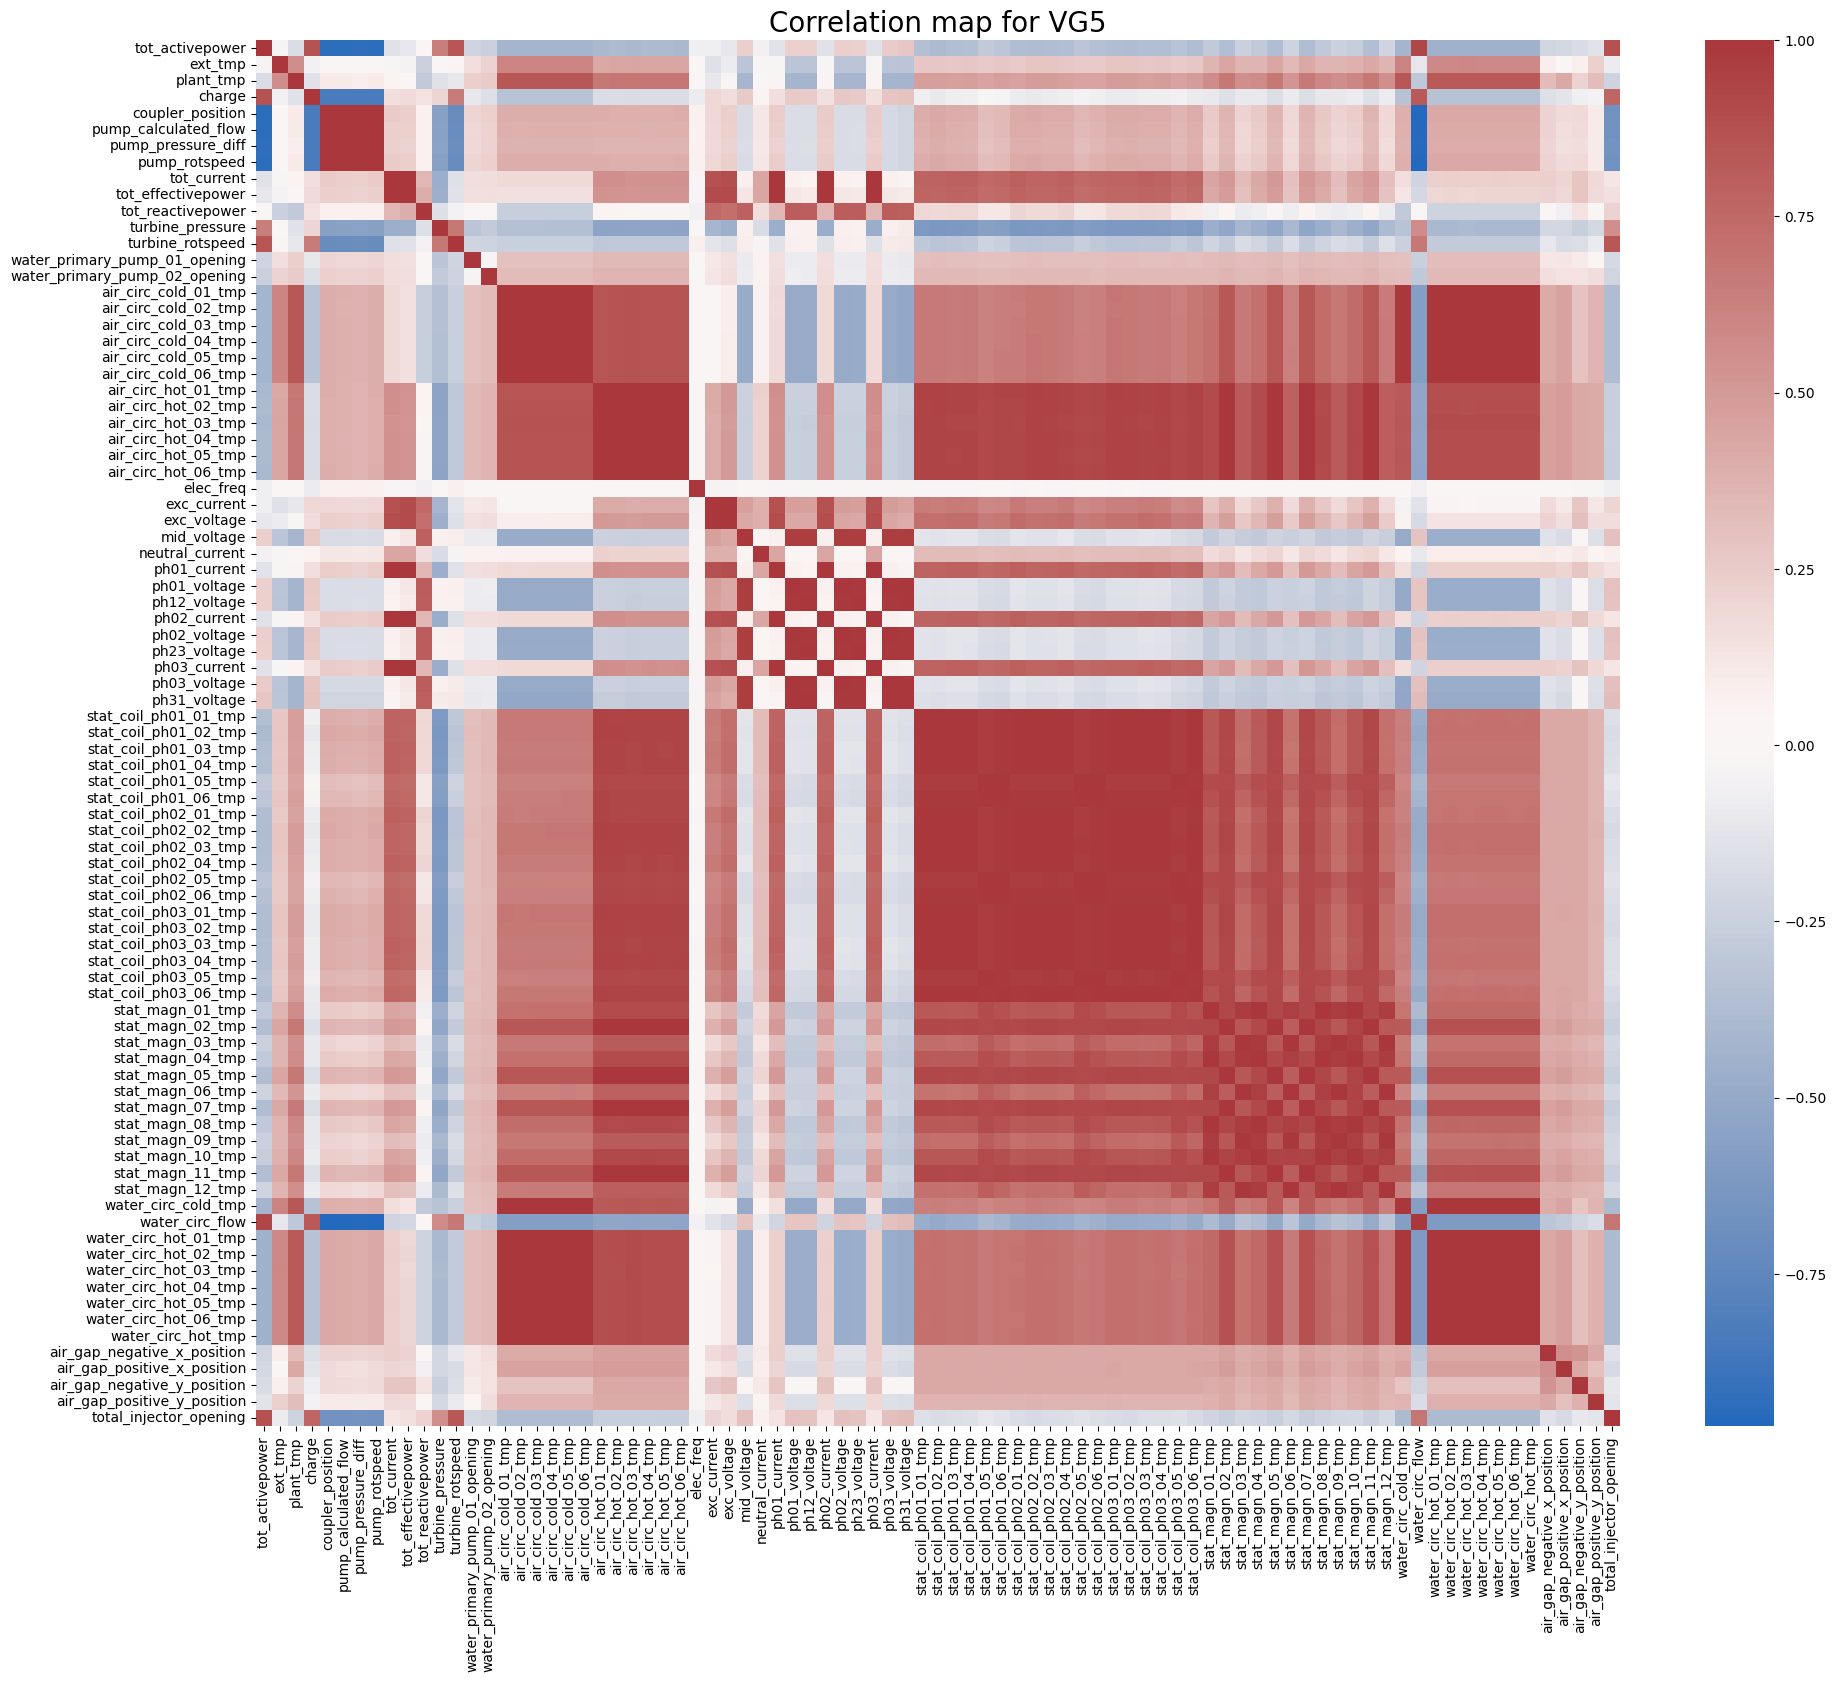

In [25]:
unit = "VG5"
training_dataset = SlidingDataset(
    parquet_file=f"Dataset/{unit}_generator_data_training_measurements.parquet",
    operating_mode="all",
    transient=False,
    window_size=1,
    device="cpu",
    features=[],
    downsampling=32,
)

fig, ax = plt.subplots(1, 1, figsize=(22, 18))
sns.heatmap(training_dataset.df.corr(), cmap="vlag", xticklabels=True, yticklabels=True, ax=ax)
ax.set_title(f"Correlation map for {unit}", fontsize=20)
fig.savefig(f"plots/correlation_{unit}.png")

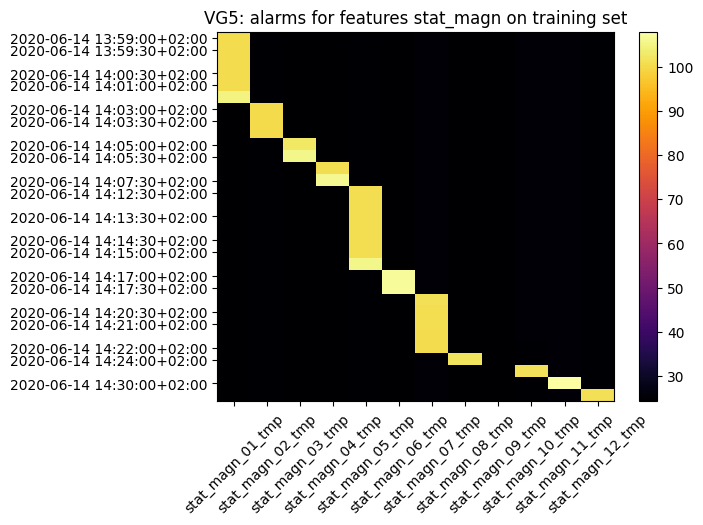

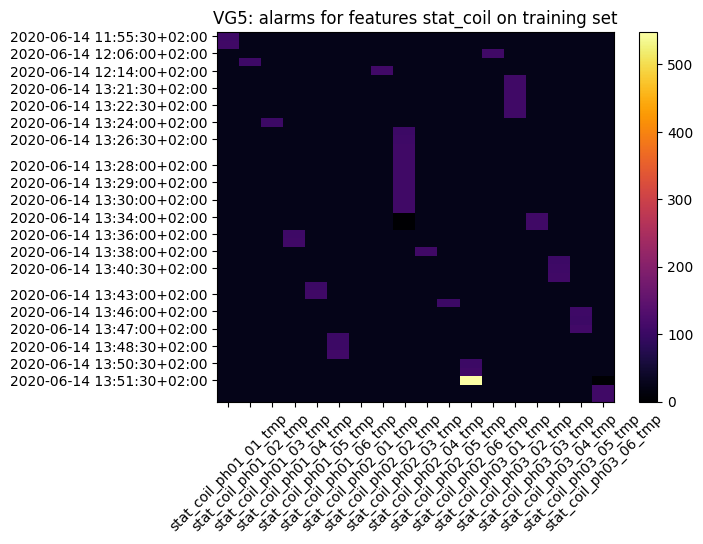

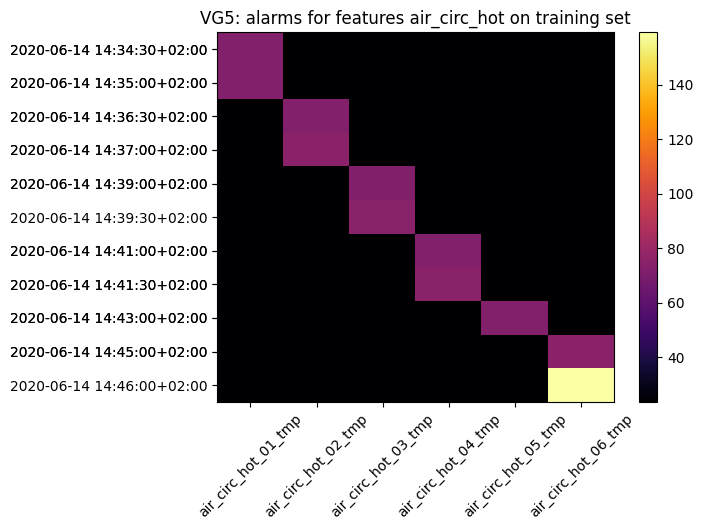

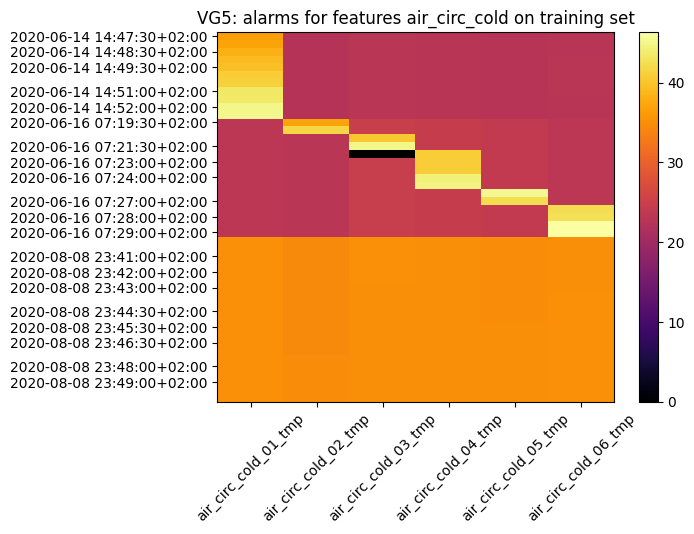

In [26]:
unit = "VG5"
train_test = "training"
# train_test = "testing_real"
df = pd.read_parquet(f"Dataset/{unit}_generator_data_{train_test}_measurements.parquet")

limits = {
    "stat_magn": 100,
    "stat_coil": 103,
    "air_circ_hot": 72,
    "air_circ_cold": 35,
}
for var, value in limits.items():
    vars = [col for col in df.columns if var in col]
    filtered = df[vars]
    filtered = filtered.loc[filtered.ge(value).any(axis=1), :]
    if len(filtered) == 0:
        continue

    fig, ax = plt.subplots()
    img = ax.imshow(filtered, cmap="inferno", aspect="auto", interpolation="none")
    ax.set_xticks(np.arange(len(filtered.columns)))
    yticks = np.linspace(start=0, stop=len(filtered.index), num=20, endpoint=False, dtype=int)
    ax.set_yticks(yticks)
    ax.set_xticklabels(filtered.columns, rotation=45)
    ax.set_yticklabels(filtered.index[yticks])
    fig.colorbar(img, ax=ax)
    ax.set_title(f"{unit}: alarms for features {var} on {"training" if "train" in train_test else "testing"} set")
    fig.savefig(f"plots/alarms_{unit}_{var}_{train_test}.png")
    plt.show()